In [1]:
import json
import glob
import matplotlib.pyplot as plt
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from word_sets import ISLAMIC_WORDS, GENERAL_WORDS, PROGRESSIVE_WORDS, RADICAL_WORDS
from word_sets import GENERAL_WORDS_ENGLISH, PROGRESSIVE_WORDS_ENGLISH
from utils import populate_b2e_dict_for_words
from plot_utils import get_association_subplot


# Select target group 
    - Progressive occupation list 
    - General occupation list 
# Reference word group
    - islamic word list 
    - radical word list 

In [2]:
target_groups = [PROGRESSIVE_WORDS, GENERAL_WORDS]
target_group_labels = ['progressive_occupation', 'general_occupation']

reference_groups = [ISLAMIC_WORDS, RADICAL_WORDS]
reference_group_labels = ['islamic', 'radical']

b2e_dict = populate_b2e_dict_for_words(PROGRESSIVE_WORDS + GENERAL_WORDS, PROGRESSIVE_WORDS_ENGLISH + GENERAL_WORDS_ENGLISH)



# CalculateDistance instalce

In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)


# Calculate association on each embedding
  ## FOR model in models:
        FOR target_group in target_groups:
          FOR reference_group in reference_groups:
            Calculate centroid of the reference_group
            FOR word in target_group:
              compute distance between word and the centroid of the reference_group
        

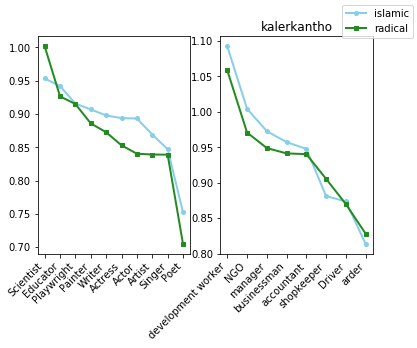

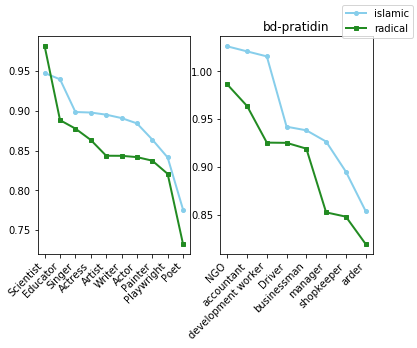

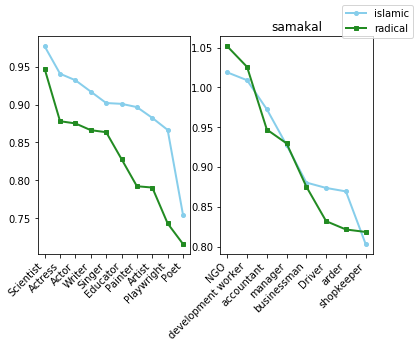

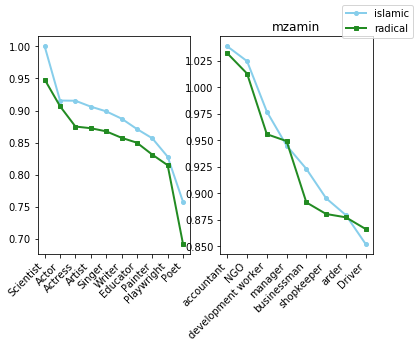

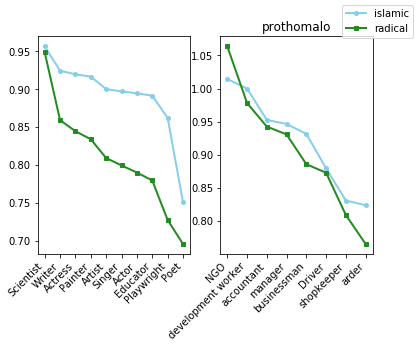

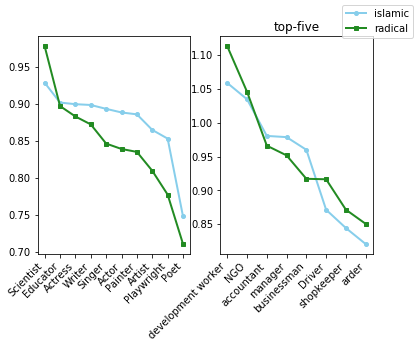

In [5]:
association_dict = {}
model_dir = '../newspaper_biasness_analysis/models/newspaper-wise/txt/'
filenames = glob.glob(model_dir + '*txt')
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)
    # print('file {} done'.format(filename))